In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact 
from ipywidgets import StaticInteract, RangeWidget

plt.rcParams['figure.max_open_warning'] = 100

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Two harmonically related sinusoids

This notebook looks at properties of two functions which can be described by

\begin{equation}
    f_E(x) = A\sin(x) - B\cos(2 x)
\end{equation}

\begin{equation}
    f_O(x) = A\cos(x) + B\sin(2 x)
\end{equation}

where $x$ is a linearly increasing function of time while $A$ and $B$ are arbitary constants. 
We will define $x$ as:

\begin{equation}
x(t) = 2\pi f t + x_{0}
\end{equation}

However, we don't in fact need to concern outselves with $f$, but we will think about $x_0$. 

## Motivation

I came across this problem while looking at modulations in the spin-down rate of pulsars. In the
work of [Jones and Andersson (2001)](http://adsabs.harvard.edu/abs/2001MNRAS.324..811J) two types of
modulation are found: geometric and electromagnetic. Both can potentially be observed by careful
timing, and I found a curious relation which wasn't immediately obvious why it occured. In this work
I am abstracting the behaviour into the function defined above. I will refer to the $-$ function as
the *even*, and the $+$ as the *odd*. Hopefully it will make sense why I decided on these labels 
later on..

## Even

Since we only really care about the relative size of $A$ and $B$ so we will define the even
function as follows

\begin{equation}
    f_E(x) = \sin(x) - R \cos(2x)
\end{equation}

Let us define the function in `python`:

In [3]:
def fEven(x, omega, x0, R):
    return np.sin(omega*x+x0) - R*np.cos(2*(omega*x+x0))

And now we will plot it, using the powerful interactive tools of the ipython notebook. We will plot a single cycle and so for all intents and purposes we will be ignoring the frequency.

In [5]:
def plot_fEven(phi0=0, R=1):
    omega=2*np.pi
    fig, ax = plt.subplots()
    x = np.linspace(0, 4*np.pi/omega, 300)
    ax.plot(x, fEven(x, omega, phi0, R))
    return fig

StaticInteract(plot_fEven, 
               phi0=RangeWidget(0, 2*np.pi, 1.0), 
               R=RangeWidget(0, 2.1, 2.1))

I have labelled this function as *even* due to the fact the function is even about any of the
maxima (but not the minimia). 

## Odd
Again we redefine it as:

\begin{equation}
    f_O(x) = \cos(x) + R \sin(2x)
\end{equation}

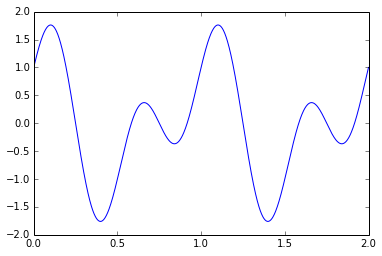

<function __main__.plot_fOdd>

In [52]:
def fOdd(x, omega, x0, R):
    return np.cos(omega*x+x0) + R*np.sin(2*(omega*x+x0))

def plot_fOdd(phi0=0, R=1):
    omega=2*np.pi
    ax = plt.subplot(111)
    x = np.linspace(0, 4*np.pi/omega, 1000)
    ax.plot(x, fOdd(x, omega, phi0, R))
    plt.show()

interact(plot_fOdd, phi0=(0, 2*np.pi), R=(0, 2.1))

Now we have the odd function, this is distinctly different from the even function. We now see the function is not
even about any either the minima or maxima.

### Transformations between the two functions

We can directly see why the two functions are different by attempting to transform one into the other by linear transformations of $x$:

\begin{align}
     f_E(x) &= \sin(x) - R \cos(2x) \\
     f_E(x+\pi/2) &= \sin(x+\pi/2) - R\cos(2(x+\pi/2) \\
     f_E(x+\pi/2) &= \cos(x) + R\cos(2x)
\end{align}

Here we have failed to transform the even into the odd function suggesting they are from two
distinct sets of solutions. While I am sure that there is a far better way to show this, this
method is sufficient for the time being. 